# Machine learning fundamentals 

This week we will be learning about the basic concepts of machine learning. The goal here is to understand several important concepts (as well as the terminology) that appear often in machine learning research. 

## What is machine learning?

* The goal of machine learning is to build **predictive models**

* These models **learn** from data to identify patterns and make predictions **without being explicitly programmed**

* Contrasts with process-based models that rely on established scientific principles and mathematical equations to describe a system's behavior

* Machine learning is **part** of artificial intelligence, but not the only part

```{image} images/ml_schematic.jpg
:width: 600px
:align: center
```

## Example - the [Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/index.html)

```{image} images/penguins.png
:width: 600px
:align: center
```
Artwork by @allison_horst

We will use the Penguin dataset to demonstrate some key concepts. This dataset contains attributes for 342 penguins collected from three islands in the Palmer Archipelago, Antarctica. More information about the Palmer Penguin dataset can be found [here](https://allisonhorst.github.io/palmerpenguins/index.html).

In [112]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Read data
df = pd.read_csv('data/penguins.csv')
print(df.shape)
df.head()

(342, 5)


,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,Adelie,39.1,18.7,181,3750
1,Adelie,39.5,17.4,186,3800
2,Adelie,40.3,18.0,195,3250
3,Adelie,36.7,19.3,193,3450
4,Adelie,39.3,20.6,190,3650


```{image} images/culmen_depth.png
:width: 600px
:align: center
```
Artwork by @allison_horst

There are three different species of penguins in this dataset. Our goal is to develop a model that can predict the species of penguin from just the attributes (i.e. **multi-class classification**). Then, when we receive more **unlabelled data** (i.e. attributes but no species), we can make a prediction about the species of penguin. 

In [113]:
df['Species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

One way to do this would be develop some decision rules. 

In [114]:
df.groupby('Species').mean()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
Species,,,,
Adelie,38.791391,18.346358,189.953642,3700.662252
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.504878,14.982114,217.186992,5076.016260


It looks like Adelie penguins have a smaller bill length and that Gentoo penguins have longer flippers and are heavier. 

* We could use our own judgement to define a threshold for separating the species based on their attributes. But this would be challenging to do when our datasets have more than a couple of attributes.

* An alternative approach is to develop a model that **learns the decision rules directly from the data** (i.e. machine learning).  

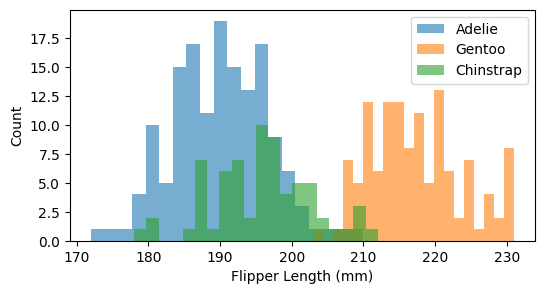

In [115]:
# Plot histogram of Flipper Length for each species
plt.figure(figsize=(6,3))
for species in df['Species'].unique():
    subset = df[df['Species'] == species]
    plt.hist(subset['Flipper Length (mm)'], bins=20, alpha=0.6, label=species)

plt.xlabel("Flipper Length (mm)")
plt.ylabel("Count")
plt.legend()
plt.show()

## Some vocabularly

* Most machine learning (in Earth Sciences) starts with a **labelled dataset**

* A **label** (or target variable) is the thing we're attempting to predict (e.g. penguin species)

* A **feature** (or predictor variable) is an individual measurable property of the dataset (e.g. flipper length)

* A **sample** are different observations or rows in the table

In [116]:
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,Adelie,39.1,18.7,181,3750
1,Adelie,39.5,17.4,186,3800
2,Adelie,40.3,18.0,195,3250
3,Adelie,36.7,19.3,193,3450
4,Adelie,39.3,20.6,190,3650


## Types of machine learning 

### Supervised learning 

* The goal is to **train** an algorithm using features in **labelled** dataset to predict the label of new data that is **unlabelled**

```{note}
That this **label** could be **categorical** (i.e. classification) or **continuous** (i.e. regression)
```

* However, it's tough to collect high-quality labelled data (time-consuming, expensive), sometimes we don't know what the labels should be.

```{image} images/captcha.jpeg
:width: 300px
:align: center
```

### Unsupervised learning

* The goal is to extract some structure from our **unlabelled dataset** that can be used to generalize.

* For example, how many different species are contained in our penguin dataset? 

* Not commonly used in geospatial data science but has a wide variety of applications (e.g. next-token prediction)


### Reinforcement learning

* An agent learns to make decisions by interacting with an environment

* For example, chess-playing like AlphaZero, self-driving cars

## Common machine learning tasks

### Classification

* "Split things into **groups** based on their **features**"

* Examples include:
    * Land cover
    * Flood risk zones
    * Sentiment analysis

```{image} images/classification.jpg
:width: 300px
:align: center
```

### Regression

* "Draw a **line** through these dots"

* Used for predicting continuous variables:
    * River discharge
    * House prices
    * Weather forecasting  

```{image} images/regression.jpeg
:width: 300px
:align: center
```

### Clustering

* "Divide data into groups but machine chooses the best way"

* Common usages include:
    * Image compression
    * Labeling training data (i.e. for supervised learning)
    * Detecting abnormal behavior
    
```{image} images/clustering.jpeg
:width: 300px
:align: center
```

## Exploring our dataset

The first step when developing any machine learning model is to gain some intuition about our dataset. `Pandas` contains some ueful functions for doing this. 

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              342 non-null    object 
 1   Culmen Length (mm)   342 non-null    float64
 2   Culmen Depth (mm)    342 non-null    float64
 3   Flipper Length (mm)  342 non-null    int64  
 4   Body Mass (g)        342 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 13.5+ KB


In [136]:
df.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


We can also investigate the **separability** of penguin species using scatterplots

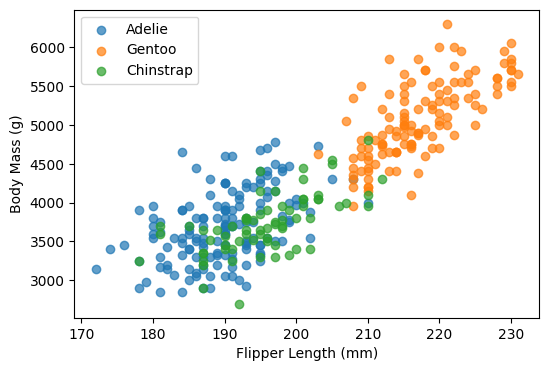

In [137]:
# Scatter plot categorized by species
plt.figure(figsize=(6,4))

species_list = df['Species'].unique()
for species in species_list:
    subset = df[df['Species'] == species]
    plt.scatter(
        subset['Flipper Length (mm)'], 
        subset['Body Mass (g)'], 
        alpha=0.7, 
        label=species
    )
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.legend()

Finally, we may also want to check the number of observations in each category. 

In [138]:
df["Species"].value_counts()

Species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

We find that there are less Chinstrap penguins than other types in this dataset. This is example **class imbalance** which we should be aware of when developing our model. For example, our model could have a high overall accuracy even if it is not be very good at identifying Chinstraps. This may mask the true performance of our model, especially for specific questions about Chinstrap penguins. 

## Feature scaling

* Machine Learning algorithms sometimes don't perform well when the input numerical attributes have very **different scales**.

* Therefore we often **scale** (or normalize) our features before training the model (e.g. min-max scaling or standardization).

```{tip}
Models that rely on the **distance** between a pair of samples (e.g. k-nearest neighbors), should be trained on normalized features to make each feature contribute approximately equally to the distance computations. In general, it is good practice to normalize everything. 
```

* **Min-max method** scales values so that they end up ranging from 0 to 1

* **Standardization** scales values so that the they have mean of 0 and unit variance.

```{image} images/scaling.png
:width: 800px
:align: center
```

In [139]:
# Import package
from sklearn.preprocessing import StandardScaler

# Define feature list
feature_list =  ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']

# Define features and labels 
X = df[feature_list]
y = df['Species']

In [140]:
# Standarize data
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=feature_list)
df_scaled.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,-0.884499,0.785449,-1.418347,-0.564142
1,-0.811126,0.126188,-1.062250,-0.501703
2,-0.664380,0.430462,-0.421277,-1.188532
3,-1.324737,1.089724,-0.563715,-0.938776
4,-0.847812,1.748985,-0.777373,-0.689020


In [141]:
df_scaled.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
count,3.420000e+02,3.420000e+02,3.420000e+02,3.420000e+02
mean,1.662088e-16,4.155221e-16,-8.310441e-16,8.310441e-17
std,1.001465e+00,1.001465e+00,1.001465e+00,1.001465e+00
min,-2.168526e+00,-2.054446e+00,-2.059320e+00,-1.875362e+00
25%,-8.615697e-01,-7.866355e-01,-7.773731e-01,-8.138982e-01
50%,9.686524e-02,7.547549e-02,-2.788381e-01,-1.895079e-01
75%,8.397670e-01,7.854492e-01,8.606705e-01,6.846384e-01
max,2.875868e+00,2.205397e+00,2.142618e+00,2.620248e+00


## Training and testing subsets

If we want to properly evaluate our machine learning model, we should not use **all** the data for training. If we did that, the model may be able to just **memorize** the dataset and would struggle predicting new, unseen data. 

Instead, we should train the model on a **subset of the data**, retaining another subset (that the model has not "seen") to **evaluate** the model. 

In [142]:
from sklearn.model_selection import train_test_split

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.2, random_state=42)

We split our data **randomly** so that 80% is used for training (`X_train` and `y_train`) and 20% is used for testing (`X_test` and `y_test`). Our test dataset therfore contains 69 individuals (and associated features), 11 of which are Chinstrap penguins.

In [143]:
y_test.value_counts()

Species
Adelie       35
Gentoo       23
Chinstrap    11
Name: count, dtype: int64

## Fitting our first model

Now we are ready to build our first model. We will first experiment with a very simple supervised algorithm that classifies our data using **K-nearest neighbors**. This algorithm computes the distance between a new data point and all training points. It then finds the closest **k-neighbors** (usually Euclidean but could be Manhattan) and uses a majority vote to assign a lablel to the new data point. 

```{image} images/k-nearest.png
:width: 500px
:align: center
```

Let's define the K-nearest neighbors classifer in `scikit-learn`. 

In [144]:
from sklearn.neighbors import KNeighborsClassifier

# Define model
model = KNeighborsClassifier(n_neighbors=3)

Once we have defined the model there are three main steps to using it: `fit`, `predict`, `score`. The `fit` method is called to train the model from the input (features) and target data.

In [145]:
# Fit model to training data
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

```{note}
In `scikit-learn` an object that has a `fit` method is called an **estimator**. We can use the estimator to make predictions on our data.
```

In [146]:
# Predict test labels
predictions = model.predict(X_test)

We then use the `score` method to evaluate the performance of our model.

In [147]:
# Score
accuracy = model.score(X_test, y_test)
model_name = model.__class__.__name__
print(f"The test accuracy using a {model_name} is {accuracy:.3f}")

The test accuracy using a KNeighborsClassifier is 0.986


To compute the score, the predictor first computes the predictions (using the predict method) and then uses a scoring function to compare the true value vs. the predictions. 

```{note}
The default scoring function for classifiers is **mean accuracy** defined as the number of correct predictions divided by the total number of samples.
```

If we compare with the accuracy obtained by wrongly evaluating the model on the **training data**, we find a higher accuracy compared to the score obtained on the held-out test data.

In [148]:
accuracy = model.score(X_train, y_train)
model_name = model.__class__.__name__
print(f"The test accuracy using a {model_name} is {accuracy:.3f}")

The test accuracy using a KNeighborsClassifier is 0.996


## Confusion matrix

Mean accuracy is a rather crude metric for evaluating the performance of our model. Each observation in the test dataset is treated equally, So, as we mentioned earlier, the model could be 100% accurate at identifying common penguin species (e.g. Adelie and Gentoo) but be bad at identifying rarer penguin species (e.g. Chinstrap) and still have a high overall accuracy.

The standard way of evaluating a multi-class prediction model is to use a confusion matrix. 

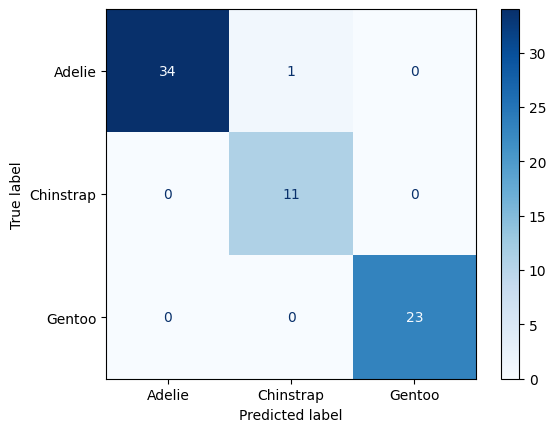

In [149]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, predictions, labels=model.classes_)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Luckily we didn't need to be worried about class imbalances. It looks like all the Chinstrap penguins in the test dataset were labelled accurately. However, our model mislabelled one Adelie penguin as a Chinstrap. 

## Cross-validation

Since our dataset has 342 individuals (i.e. not that many), we might as well use them all to fit our model. But, if we do this, we won't be able to effectively evaluate our model. To overcome this, we can use a technique called **cross-validation** which involves systematically repeating the train-test split such that the training and testing datasets are different for each evaluation. 

```{image} images/kfold.png
:width: 800px
:align: center
```

In [150]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Define cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
test_scores = cross_val_score(model, df_scaled, y, cv=cv)

print(f"The mean test accuracy using cross-validation is {np.mean(test_scores):.3f}")

The mean test accuracy using cross-validation is 0.988


```{note}
When we set `n_splits` to **5**, the dataset is split into 5 roughly equal parts (“folds”). In each round, 4 folds are used for training and 1 fold is used for testing (i.e. 80/20 split). If we set `n_splits` to 10, then the dataset would be split into 10 folds, meaning that 9 would be used for training and 1 for testing (i.e. 90/10 split). The split is therefore dependent on the number of folds. `KFold` may not be appropriate for small datasets (since `n_splits` cannot be larger than number of samples). 
```

An alternative approach is called the `ShuffleSplit` which, as the name suggests, shuffles the dataset randomly and then splits it into a training set and a test set according to the sizes that we choose. This approach allows us to define specific train-test splits. 

```{image} images/shufflesplit.png
:width: 800px
:align: center
```

In [151]:
from sklearn.model_selection import ShuffleSplit

# Define cross-validation
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Perform cross-validation
test_scores = cross_val_score(model, df_scaled, y, cv=cv)

print(f"The mean test accuracy using cross-validation is {np.mean(test_scores):.3f}")

The mean test accuracy using cross-validation is 0.991


## Decision Tree Classifier

K-nearest Neighbors is an odd type of model because it doesn't actually learn during training. It simply stores the training data and makes predictions based on distances to a specific number of neigbors at inference time. But now that we have formatted our data for K-nearest neighbors, we can easily test other, more conventional machine learning models available in `scikit-learn`. 

In [153]:
from sklearn.tree import DecisionTreeClassifier

# Define model
model = DecisionTreeClassifier(max_depth=2)

# Fit model
model.fit(df_scaled, y)

# Score
test_scores = cross_val_score(model, df_scaled, y, cv=5)
model_name = model.__class__.__name__
print(f"The test accuracy using a {model_name} is {np.mean(test_scores):.3f}")

The test accuracy using a DecisionTreeClassifier is 0.953


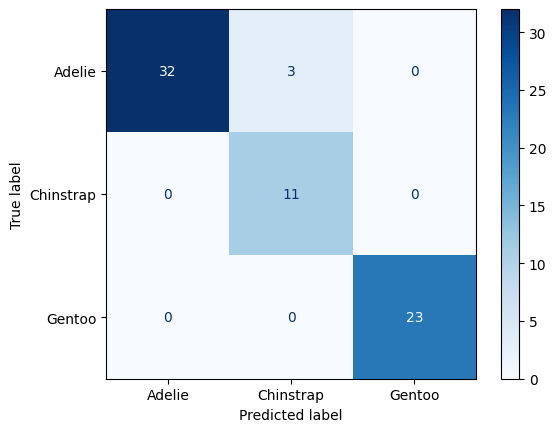

In [154]:
# Predict test labels
predictions = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, predictions, labels=model.classes_)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

The nice thing about Decision Trees is that we can visualize the fitted model.

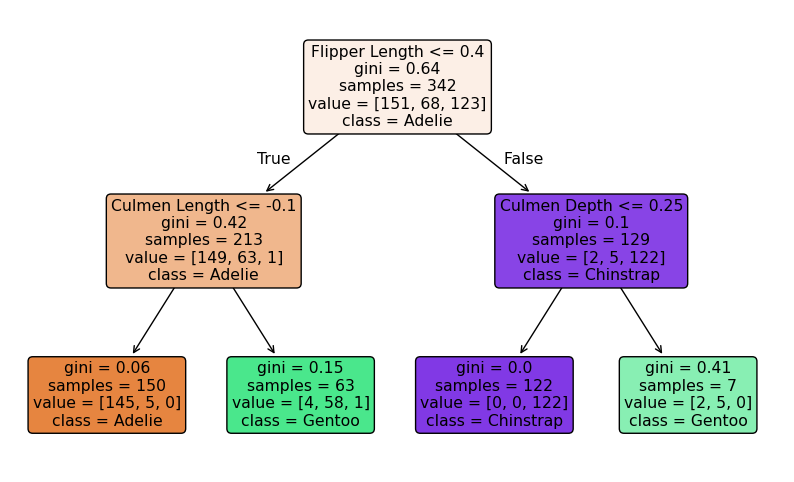

In [155]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 6))
plot_tree(model,
          feature_names=['Culmen Length', 'Culmen Depth', 'Flipper Length', 'Body Mass'], 
          class_names=df['Species'].unique(),
          filled=True, impurity=True,       
          proportion=False, rounded=True,        
          precision=2)
plt.show()

```{note}
The attribute (e.g. `Flipper Length`) can be positive or negative because we standardized the values.
```

Decision trees partition the feature space by considering a single feature at a time. We start with 273 samples (80% of dataset), if `Flipper Length` is smaller than `0.47` then we are left with 168 samples, most of which are now `Adelie`. Then, if `Culmen Length` is less than `-0.14`, we are left with **116** samples which we classify as `Adelie`. Unfortunately, it looks like **4** of these penguins are actually `Gentoos`. 

We might be asking a couple more questions by now: 1) How does the model choose these thresholds and 2) what is `gini`?

## Loss (or error) functions

During the learning process, our Decision Tree is trying to find a set of thresholds that make the fewest mistakes when classifying our training data. To find the best thresholds, we need a way to evaluate whether one set of thresholds are better than another. We use **loss functions** to do this. 

Decision Trees commonly use the **Gini loss function** (or impurity). This index measures how mixed the classes are in a given group of samples (i.e. **entropy**). If a group of samples all belong to the same class, the Gini impurity is 0 (perfectly "pure"). If the group has a mix classes, the impurity is higher. At each split, the Decision Tree algorithm tries to reduce entropy or the minimize Gini impurity.

For regression, a common loss function is **absolute loss** (i.e. MAE) where loss grows **linearly** with absolute mispredicted amount. This loss function is approproate for noisy data, when some mispredictions are unavoidable and shouldn't dominate the loss.

Another common loss function in regression is **squared loss** (i.e. MSE) where loss grows **quadratically** with the absolute mispredicted amount. If a prediction is very close to being correct, the square will be small and little attention will be given to that example to obtain zero error. On the other hand, the penalty will be large for predictions that are really far off.

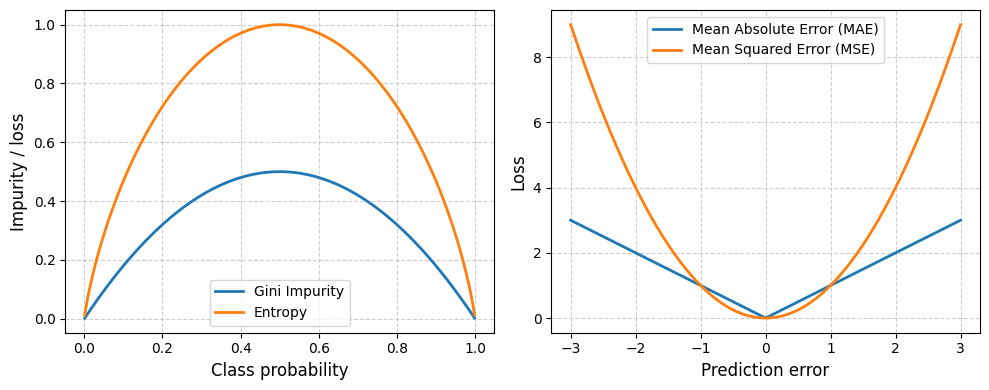

In [156]:
# Generate a range of prediction errors for regression losses
errors = np.linspace(-3, 3, 400)
mae = np.abs(errors)
mse = errors**2

# Generate probabilities for classification impurity measures
p = np.linspace(0.001, 0.999, 400)  # avoid log(0)
gini = 2 * p * (1 - p)
entropy = -(p * np.log2(p) + (1 - p) * np.log2(1 - p))

# Plot
fig, axes = plt.subplots(1, 2, figsize=(10,4))

axes[0].plot(p, gini, label="Gini Impurity", linewidth=2)
axes[0].plot(p, entropy, label="Entropy", linewidth=2)
axes[0].set_xlabel("Class probability", fontsize=12)
axes[0].set_ylabel("Impurity / loss", fontsize=12)
axes[0].legend()
axes[0].grid(True, linestyle="--", alpha=0.6)

axes[1].plot(errors, mae, label="Mean Absolute Error (MAE)", linewidth=2)
axes[1].plot(errors, mse, label="Mean Squared Error (MSE)", linewidth=2)
axes[1].set_xlabel("Prediction error", fontsize=12)
axes[1].set_ylabel("Loss", fontsize=12)
axes[1].legend()
axes[1].grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

## Parameters

Both models that we have used so far can be **customized** using parameters. We can apply the `get_params()` method to our estimators to see what we can adjust. 

For our `KNeighborsClassifier`, the most important parameter is `n_neighbors` which is the number of neighboring observations that the algorithm looks at when making a prediction.

In [158]:
# Define model
model = KNeighborsClassifier()

# Print all hyperparameters
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

For our `DecisionTreeClassifier`, there are more parameters we can adjust but the main one is the `max_depth` which limits the number of levels (or layers of splits) in a decision tree. 

In [160]:
# Define model
model = DecisionTreeClassifier()

# Print all hyperparameters
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

If we set `max_depth` to be small (e.g. <3) then the tree will be shallow and model is only likely to capture broad, simple patterns. It may therefore be prone to **underfitting**. 

In contrast, if we do not set `max_depth`, it defaults to `None` meaning that there is no limit on the height of the tree. On the one hand, this may be useful because the tree is more likely to capture more subtle patterns. However, if the tree becomes too deep, then it may begin to split the data until every sample is perfectly separated. If the dataset contains **noise** (which is likely), then the tree will be fitted not only to the true signal but also to **noise** in the data. We call this **overfitting** and it can reduce the overall accuracy of our model.

```{important}
Machine learning models tend to be very flexible meaning that they are great at finding complex, non-linear patterns in data. The cost of such flexibility is that they will **memorize** or **overfit** the training data if not properly developed. Preventing them doing this is therefore possibly the greatest challenge in machine learning research.
```

## Hyperparameter tuning

So can we pick a `max_depth` that prevents our model underfitting or overfitting our data? Yes, we can and one way to do that is to use **hyperparameter tuning**. We will demonstrate this timing using **Decision Tree Regression** where the goal is to **predict a continuous variable**. We will first develop a shallow tree (i.e. `max_depth=2`) to model the relationship between `Flipper Length` and `Body Mass`. 

Text(0, 0.5, 'Body Mass (g)')

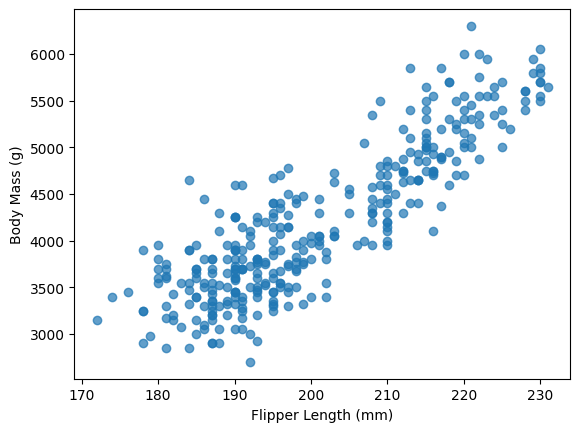

In [161]:
plt.scatter(df['Flipper Length (mm)'], df['Body Mass (g)'], alpha=0.7)
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")

Text(0, 0.5, 'Body Mass (g)')

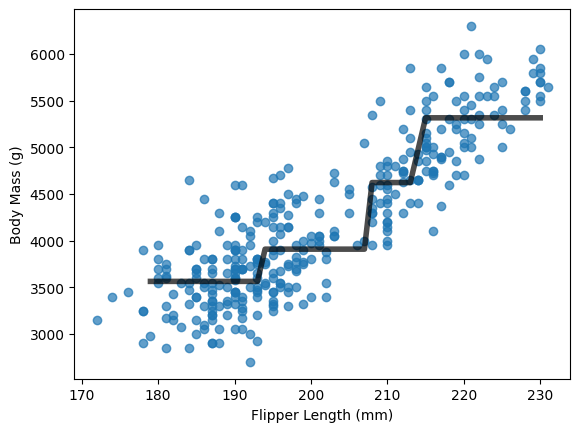

In [162]:
from sklearn.tree import DecisionTreeRegressor

# Select features and target
X = df[["Flipper Length (mm)"]]
y = df["Body Mass (g)"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Initialize and fit the model
model = DecisionTreeRegressor(max_depth=2, random_state=42)
model.fit(X_train, y_train)
y_predicted = model.predict(X_test.sort_values(by='Flipper Length (mm)'))

plt.scatter(df['Flipper Length (mm)'], df['Body Mass (g)'], alpha=0.7)
plt.plot(X_test.sort_values(by='Flipper Length (mm)'), y_predicted, linewidth=4, color='k', alpha=0.7)
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")

Text(0, 0.5, 'Body Mass (g)')

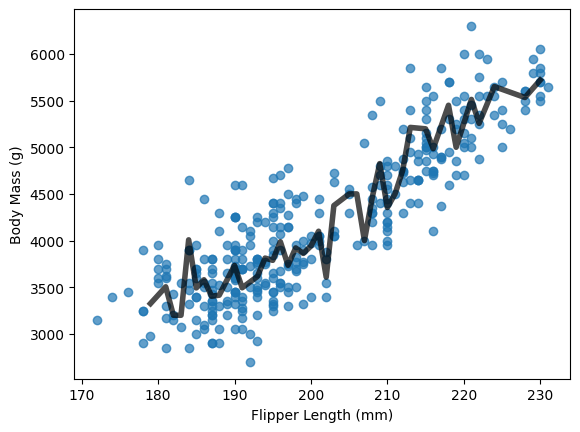

In [163]:
# Remove the limit on max depth
model = DecisionTreeRegressor(max_depth=None, random_state=42)
model.fit(X_train, y_train)
y_predicted = model.predict(X_test.sort_values(by='Flipper Length (mm)'))

plt.scatter(df['Flipper Length (mm)'], df['Body Mass (g)'], alpha=0.7)
plt.plot(X_test.sort_values(by='Flipper Length (mm)'), y_predicted, 
         linewidth=4, color='k', alpha=0.7)
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")

In [164]:
model.get_depth()

10

Our "unconstrained" Decision Tree developed a very deep tree with 10 levels.  

We can find the optimal `max_depth` by iteratively searching over specified parameter values for an estimator using the `GridSearchCV` function.

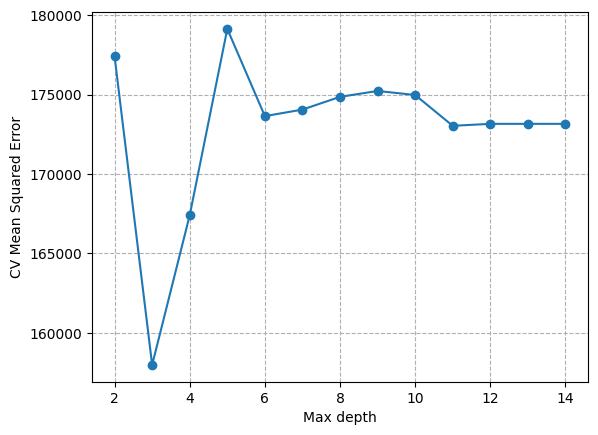

In [165]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid (i.e. max depth ranging from 2 to 14)
param_grid = {"max_depth": np.arange(2, 15, 1)}

# Define model
tree_reg = DecisionTreeRegressor()

# Define GridSearch estimator
grid_search = GridSearchCV(
    estimator=tree_reg,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error'
)

# Fit model
grid_search.fit(X_train, y_train)

results = pd.DataFrame(grid_search.cv_results_)
plt.plot(results['param_max_depth'], -results['mean_test_score'], marker='o')
plt.xlabel("Max depth")
plt.ylabel("CV Mean Squared Error")
plt.grid(ls='dashed')

Text(0, 0.5, 'Body Mass (g)')

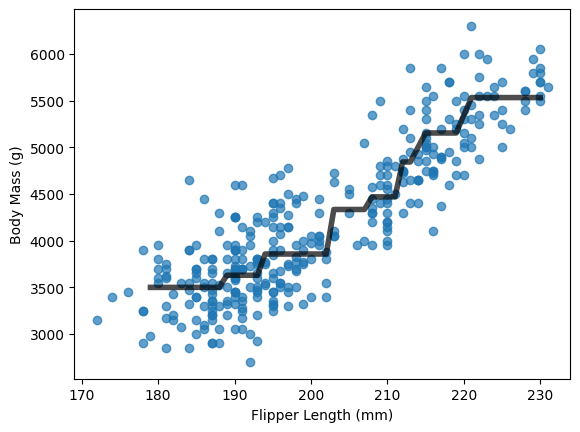

In [166]:
# Fit model with optimal max depth value
model = DecisionTreeRegressor(max_depth=grid_search.best_params_['max_depth'], random_state=42)
model.fit(X_train, y_train)
y_predicted = model.predict(X_test.sort_values(by='Flipper Length (mm)'))

plt.scatter(df['Flipper Length (mm)'], df['Body Mass (g)'], alpha=0.7)
plt.plot(X_test.sort_values(by='Flipper Length (mm)'), y_predicted, linewidth=4, color='k', alpha=0.7)
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")

So, to summarize... we identified a parameter (`max_depth`) that had a large influence on the complexity of our model. We then used **hyperparameter tuning** to find the optimal value for this parameter. In this case, we defined **optimal** as the lowest **mean squared error**. Higher `max_depth` caused an increase in MSE because our model **overfit** the data. We only had to incerease `max_depth` to **3** to reduce **underfitting**. This kind of tuning is common practice when developing machine learning models. 

```{note}
If a complex model does not provide substantial accuracy gains compared to a simple model, then we should choose the "simplest" model (e.g. lower `max_depth`) for our analysis.
```

## Another example - California House Prices

We are starting to approach the limit of our penguin dataset, so we will now use a new dataset that contains the median value of houses in an area in California. The features collected are based on some statistical averages for each region and geographic information. 

First let's import the data and define a decision tree regressor with no limit on `max_depth`.

In [167]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Load data
housing = fetch_california_housing(as_frame=True)
data, target = housing.data, housing.target
target *= 100  # rescale the target in k$
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [168]:
# Define estimator
regressor = DecisionTreeRegressor(max_depth=None)

# Split
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=42)

# Fit
regressor.fit(data_train, target_train)

# Predict
target_predicted = regressor.predict(data_test)
score = mean_absolute_error(target_test, target_predicted)
print(f"The testing error of our model is {score:.2f} k$")

The testing error of our model is 46.74 k$


Sometimes the testing error alone does not provide sufficient information to determine whether a model is over- or under-fitting. To investigate in more detail, it is useful to track the **training error**. This metric is defined as the accuracy of our model when applied to the target variable (i.e house price) of the **training dataset** (as opposed to the testing dataset).

In [169]:
# Fit
regressor.fit(data_train, target_train)

# Predict
target_predicted = regressor.predict(data_train)
score = mean_absolute_error(target_train, target_predicted)
print(f"The training error of our model is {score:.2f} k$")
print("Tree depth:", regressor.tree_.max_depth)
print("Number of leaves:", regressor.tree_.n_leaves)

The training error of our model is 0.00 k$
Tree depth: 36
Number of leaves: 14844


We get perfect prediction with **zero training error**. This is because our decision tree grew so large that it was able to fully memorize our dataset. This should set off some alarm bells because it means our model is likely capturing **noise**. 

We can use **validation curves** to pick a `max_depth` that is more appropriate for our dataset. 

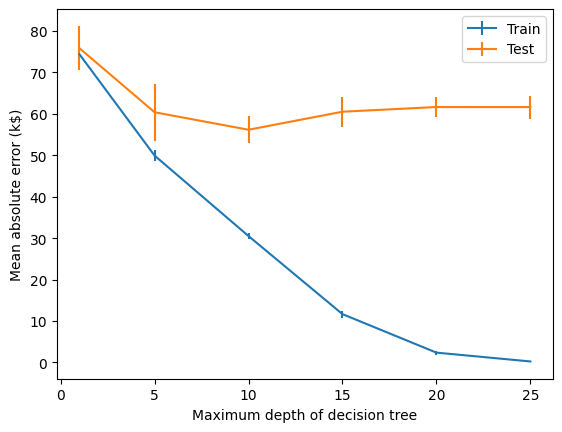

In [170]:
from sklearn.model_selection import ValidationCurveDisplay

max_depth = np.array([1, 5, 10, 15, 20, 25])
disp = ValidationCurveDisplay.from_estimator(
    regressor, data, target, param_name="max_depth", param_range=max_depth,
    scoring="neg_mean_absolute_error", negate_score=True, std_display_style="errorbar", n_jobs=2)
_ = disp.ax_.set(
    xlabel="Maximum depth of decision tree",
    ylabel="Mean absolute error (k$)",)

* For `max_depth < 10`, the decision tree underfits the data. The training error and therefore the testing error are both high because the model is too constrained and cannot capture much of the variability of in house prices.

* The decision tree generalizes the best at `max_depth = 10`. It is flexible enough to capture a fraction of the variability of the target that generalizes, while not memorizing all of the noise in the target.

* The decision tree overfits for `max_depth > 10`. The training error becomes very small, while the testing error actually increases. At these `max_depths`, the model is **memorizing** the dataset, including the noise, which is harming its ability to generalize to the test data.

Another example of under- or over-fitting would be a polynomial function that had too few or too many degrees.

```{image} images/underover.png
:width: 800px
:align: center
```

## Noise

Our house price dataset likely contains a lot of noise. The price of the house could depend time of year or the circumstances of the buyer or seller. These factors are not considered in the features. Since these missing feature are randomly varying from one sample to the next, it appears as if the target variable was changing because of the impact of a random perturbation or noise, even if there were no errors made during the data collection process.

The same is true for environmental data. We may not be able to measure something that impacts the target variable. It is also possible that there are instrumental errors such as poorly calibrated sensors, limitations in precision, or interference that impact the accuracy of our data. Those unpredictable data acquisition errors can happen either on the input features **or** in the target variable (in which case we often name this **label noise**).

While it is challenging to understand which kind of “noise” is dominating, there are several strategies for reducing the sensitivity of our models to noise:

* **Data augmentation**: increase the number of labeled samples in our training dataset

* **Regularization**: enforce limits or penalize models that become too complex

* **Ensemble models**: combine predictions from multiple different models to average out errors from individual models

And there are probably many other strategies...

## Learning curves

Besides under- and over-fitting, it is also important to understand how the accuracy of our model is influenced by the **number of samples available**. To investigate this source of error, we can synthetically reduce the number of samples used to train the predictive model and check the training and testing errors using a **learning curve**. 

```{note}
A learning curve could also be used to investigate how the testing error changes with number of training cycles or epochs.
```

Let’s compute the learning curve for a decision tree and vary the proportion of the training set from 10% to 100%.

In [171]:
train_sizes = np.linspace(0.1, 1.0, num=5, endpoint=True)
train_sizes

array([0.1  , 0.325, 0.55 , 0.775, 1.   ])

We will use a `ShuffleSplit` cross-validation to assess our predictive model.

In [172]:
cv = ShuffleSplit(n_splits=30, test_size=0.2)

Now, we are all set to carry out the experiment.

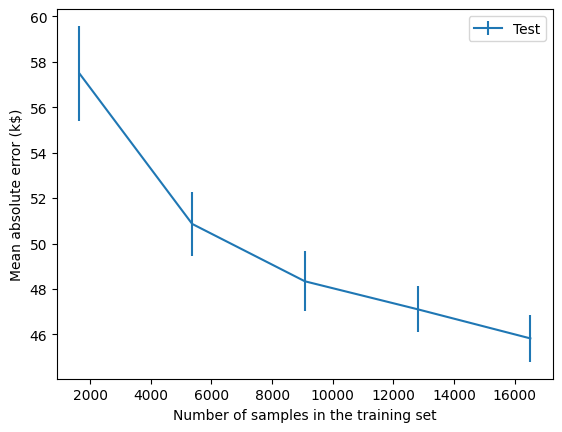

In [173]:
from sklearn.model_selection import LearningCurveDisplay

display = LearningCurveDisplay.from_estimator(
    regressor, data, target, train_sizes=train_sizes, cv=cv,
    score_type="test",
    scoring="neg_mean_absolute_error",
    negate_score=True,
    score_name="Mean absolute error (k$)",
    std_display_style="errorbar",
    n_jobs=2,
)

We find that the testing error becomes lower as more samples are added to the training set. It looks as though the testing error is starting to plateau a bit but it is also still going down. We can therefore conclude that **more samples would probably improve our predictive model**. 

This kind of analysis can be useful for informing decision-making. If it is possible to collect more samples, then we should probably do that. If that is not possible, we may consider artificially creating new, modified copies of existing data (i.e. **data augmentation**). 

On the other hand, if the testing error did plateau, then collecting more samples would not be useful and we may reserve our efforts for other things e.g. reducing or handling noise in dataset, developing more sophisticated models etc.

## Ensembles

**Ensemble learning** is a popular way to control overfitting. This is a technique where multiple individual models are combined to produce a single more robust (and often more accurate) prediction model. The two main approaches to ensemble learning are 1) **bagging** (i.e. Bootstrap AGGregatING) and 2) **boosting**. We can use these strategies to combine many Decision Trees into powerful models that generalize better. 

## Bagging

Bagging involves fitting a base estimator (e.g. Decision Tree) to a **random subset** of our original dataset and then aggregating their individual predictions (either by voting or by averaging) to generate a final prediction. This approach exploits the **Weak Law of Large Numbers** which states that "*the mean of a collection of independent and identically distributed samples from a random variable converges in probability to the expected value*". 

The bagging procedure can be conceptualized using the plot below which shows our Penguin dataset. The first panel shows all the observations in our dataset. The other three panels show a random subset. To perform bagging, we would train **independent models** on each of these random subsets.

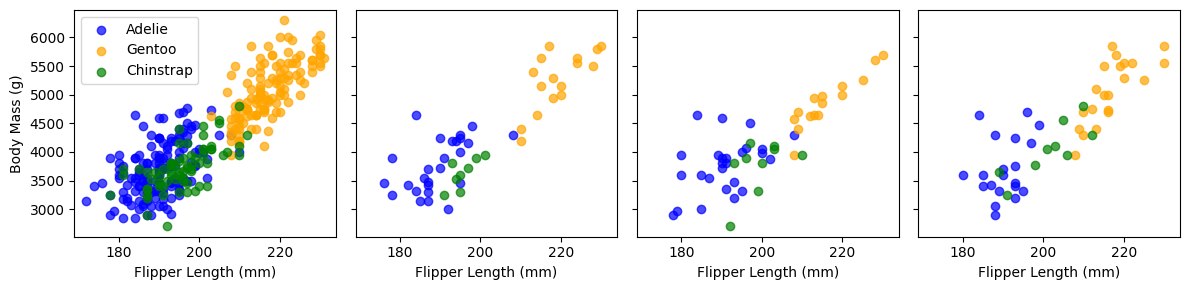

In [174]:
from sklearn.utils import resample

species_list = df['Species'].unique()
colors = {"Adelie": "blue", "Chinstrap": "green", "Gentoo": "orange"}

# Create 4 subplots
fig, axes = plt.subplots(1, 4, figsize=(12, 3), sharex=True, sharey=True)
axes = axes.flatten()

# Panel 1: Full data
for species in species_list:
    subset = df[df['Species'] == species]
    axes[0].scatter(
        subset['Flipper Length (mm)'],
        subset['Body Mass (g)'],
        alpha=0.7,
        label=species,
        color=colors[species])

axes[0].set_xlabel("Flipper Length (mm)")
axes[0].set_ylabel("Body Mass (g)")
axes[0].legend()

# Panels 2–4: Bootstrap samples
for i in range(1, 4):
    sample_df = resample(df, replace=False, n_samples=50, random_state=42 + i)

    for species in species_list:
        subset = sample_df[sample_df['Species'] == species]
        axes[i].scatter(
            subset['Flipper Length (mm)'],
            subset['Body Mass (g)'],
            alpha=0.7,
            label=species,
            color=colors[species]
        )
        axes[i].set_xlabel("Flipper Length (mm)")
plt.tight_layout()
plt.show()

`Scikit-learn` implements the bagging procedure as a **meta-estimator**: an estimator that wraps another estimator by cloning it several times and training it independently on each random subset. Below we define a meta-estimator (i.e. `BaggingClassifer`) with **100 independent** `DecisionTreeClassifiers` (i.e. `n_estimators`). 

In [175]:
from sklearn.ensemble import BaggingClassifier

# Define base estimator
clf = DecisionTreeClassifier()

# Initialize bagging "meta-estimator"
bclf = BaggingClassifier(estimator=clf, n_estimators=100)

# Fit
scores = cross_val_score(bclf, df[feature_list], df['Species'], cv=5)

# Print scores
print(f"{np.mean(scores):.3f}")

0.977


A note on the size of the random samples. The default parameters for the `BaggingClassifer` is `max_samples=1.0` which implies that 100% of the training dataset is used in each random subset. But `bootstrap=True` indicates that our **sampling involves replacement**. This means that our random subset has the same number of items as our original training datset but is still different because it may **duplicate** some items and not select others. Hence, **Bootstrap AGGregatING = Bagging**.

In [176]:
bclf.get_params()

{'bootstrap': True,
 'bootstrap_features': False,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__monotonic_cst': None,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Our `BaggingClassifier` picks random subsets from the data but the Decision Trees may all be quite similar because they **consider all features** when making splits. 

A `RandomForestClassifier` is a specialized version of decision tree bagging that adds another source of randomness. Instead of considering all features when making splits in the decision tree, it **considers only a random subset of features**. This increases the difference between decision trees, often leading to reduced overfitting and testing error.

In [177]:
from sklearn.ensemble import RandomForestClassifier

# Define model
bclf = RandomForestClassifier(n_estimators=100, oob_score=True)

# Fit
bclf.fit(df[feature_list], df['Species'])

#Print score
print(f"{bclf.oob_score_:.3f}")

0.974


```{note}
Since each tree is trained on a bootstrap sample (i.e. with replacement), about 1/3 of the data is left out during the training. These "out-of-bag" samples can be used to generate a fairly reliable estimate of the **testing error** without having to split the data or perform computationally expensive cross-validation. 
```

In [178]:
bclf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Random Forests is a very popular ensemble algorithm. This is partly because it almost always performs better than single models and partly because it is not very sensitive to the choice of hyperparameters. There are really only two hyperparameters to pick, `n_estimators` which can be as large as you can computationally afford and `max_features` which determines the number of features to use for each tree. Usually the default value of `sqrt(n_features)` is appropriate. Furthermore, since decision trees work with features that have different scales or magnitudes, preprocessing is minimal.

## Boosting

Boosting is another ensembling approach that considers all our training data but fits models **sequentially** (instead of bagging independently on random subsets). To do this, it fits an initial model and then **re-weights** misclassified observations so that the next model will focus on classifying them correctly. Final prediction is usually a weighted average of these individual models (with more accurate models being weighted higher). Usually the individual models used in boosting are simple (e.g. shallow decision trees) and we call them **weak learners**. 

In its most simplest form, boosting can be implemented by re-weighting our data such that **mispredicted samples** are assigned a **value of 1** and **accurately predicted samples** are assigned a **value of 0**. If we do this, then the new classifier will only consider misclassified samples during its training phase. 

```{image} images/boosting.png
:width: 600px
:align: center
```

In practice, there are statistical algorithms that have been developed for determining how sample weights should be updated. The classic version of this approach is called `AdaBoost` (i.e. Adaptive Boosting). 

In [179]:
from sklearn.ensemble import AdaBoostClassifier

# Define base estimator
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Initialize boosting "meta-estimator"
bclf = AdaBoostClassifier(clf, n_estimators=5, random_state=42)

# Fit
bclf.fit(df_scaled, df['Species'])

print("Error rate of each classifier:", 
      [f"{err:.3f}" for err in bclf.estimator_errors_])
print("Weight of each classifier:",
      [f"{err:.2f}" for err in bclf.estimator_weights_])

# Score
scores = cross_val_score(bclf, df_scaled, df['Species'], cv=5)
model_name = bclf.__class__.__name__
print(f"The testing accuracy using a {model_name} is {np.mean(scores):.3f}")

Error rate of each classifier: ['0.035', '0.041', '0.109', '0.054', '0.111']
Weight of each classifier: ['4.01', '3.83', '2.80', '3.56', '2.77']
The testing accuracy using a AdaBoostClassifier is 0.982


We developed an `AdaBoostClassifier` with **5** different `DecisionTreeClassifiers`, each of which are shallow (i.e. `max_depth=2`). The **error rate** for each classifier determines the **classifier’s weight** in the final ensemble. 

## Gradient boosting

While AdaBoost is a useful algorithm for learning about boosting, it is not the most computationally efficient or flexible. Nowadays, **Gradient Boosting** is much more popular. Gradient boosting also fits models sequentially but instead of re-weighting the mispredicted samples, it computes the **residual errors** between the actual and predicted samples and fits a new model to these residuals. 

```{image} images/gradient-boosting.png
:width: 500px
:align: center
```

In [180]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize gradient boosting classifier
bclf = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit
bclf.fit(df_scaled, df['Species'])

# Score

scores = cross_val_score(bclf, df_scaled, df['Species'], cv=5)
model_name = bclf.__class__.__name__
print(f"The testing accuracy using a {model_name} is {np.mean(scores):.3f}")

The testing accuracy using a GradientBoostingClassifier is 0.982


In [181]:
bclf.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

Gradient boosting is also useful for regression. Here we apply a `GradientBoostingRegressor` to predict house prices. The plot below is a **learning curve** (or loss curve) that shows how the model’s performance improves as we increase the number of estimators in the ensemble. The performance improves rapidly to begin with since the base estimator is a **weak learner** and residuals are large and easy to learn. But as the residuals become smaller and smaller, newer models provide less of an improvement and the performance starts to plateau. 

```{note}
All Gradient Boosting algorithms use Decision Trees (also known as Classification and Regression Trees (CART)) as their base estimators.
```

This idea of fitting new weak learners to the **negative gradient of the loss function** explains why this class of models are called **gradient boosting algorithms**. By predicting the gradient, the new learners compute the direction **and** magnitude of adjustment needed to reduce the loss. 

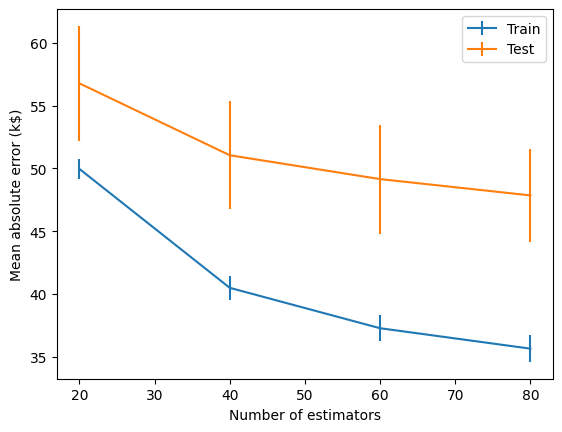

In [182]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize gradient boosting regressor
breg = GradientBoostingRegressor()

n_estimators = np.arange(0, 100, 20)
disp = ValidationCurveDisplay.from_estimator(
    breg, data, target, param_name="n_estimators", param_range=n_estimators,
    scoring="neg_mean_absolute_error", negate_score=True, std_display_style="errorbar", n_jobs=2)
_ = disp.ax_.set(
    xlabel="Number of estimators",
    ylabel="Mean absolute error (k$)",)

Gradient Boosting algorithms (e.g. **XGBoost**, **CatBoost**) have emerged as some of the most powerful and widely used methods for machine learning, often outperforming deep learning models. They consistently rank at the top of benchmark datasets and machine learning competitions, especially for tasks involving **structured** (i.e. tabular) data. 

| Aspect | **Bagging** | **Boosting** |
|--------|-------------|--------------|
| **Full name** | Bootstrap Aggregating | Adaptive Boosting |
| **Main goal** | Reduce **variance** (i.e. overfitting) | Reduce **bias** (i.e. underfitting) |
| **Learning process** | Models are trained **independently and in parallel** | Models are trained **sequentially**, each correcting the previous one |
| **Data sampling** | Uses **bootstrap samples** (random sampling with replacement) | Uses **all data**, but increases weight on misclassified data |
| **Base learners** | Usually high-variance models (e.g. deep decision trees) | Usually weak learners (e.g. shallow decision trees) |
| **Model diversity** | Comes from random sampling of data/features | Comes from focusing on “hard” cases (errors or gradients) |
| **Parallelization** | Easy to parallelize (since learners are independent) | Harder to parallelize (since each step depends on previous) |
| **Algorithms** | Random Forests | AdaBoost, Gradient Boosting, XGBoost |


## Further reading

Scikit-learn developers. (2022) [Machine learning in Python with scikit-learn MOOC](https://inria.github.io/scikit-learn-mooc/index.html)

Weinberger, K. (2018). [Machine Learning for Intelligent Systems](https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/)